In [156]:
%run -i 'apple-health-data-parser' 'export.xml'

Reading data from export.xml . . . done


apple-health-data-parser.py:130: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  self.nodes = self.root.getchildren()


Unexpected node of type ExportDate.

Tags:
ActivitySummary: 11
ExportDate: 1
Me: 1
Record: 121673
Workout: 5

Fields:
HKCharacteristicTypeIdentifierBiologicalSex: 1
HKCharacteristicTypeIdentifierBloodType: 1
HKCharacteristicTypeIdentifierDateOfBirth: 1
HKCharacteristicTypeIdentifierFitzpatrickSkinType: 1
activeEnergyBurned: 11
activeEnergyBurnedGoal: 11
activeEnergyBurnedUnit: 11
appleExerciseTime: 11
appleExerciseTimeGoal: 11
appleStandHours: 11
appleStandHoursGoal: 11
creationDate: 121678
dateComponents: 11
device: 121669
duration: 5
durationUnit: 5
endDate: 121678
sourceName: 121678
sourceVersion: 121678
startDate: 121678
totalDistance: 5
totalDistanceUnit: 5
totalEnergyBurned: 5
totalEnergyBurnedUnit: 5
type: 121673
unit: 121673
value: 121674
workoutActivityType: 5

Record types:
ActiveEnergyBurned: 11226
AppleExerciseTime: 423
BasalEnergyBurned: 10596
BodyMass: 1
DistanceWalkingRunning: 44472
FlightsClimbed: 7713
HeartRate: 4107
HeartRateVariabilitySDNN: 2
Height: 1
RestingHeartRa

In [194]:
%matplotlib notebook
%config InlineBackend.print_figure_kwargs={'bbox_inches': None}
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv('HeartRate.csv')
df[['creationDate','startDate','endDate']]=df[['creationDate','startDate','endDate']].apply(pd.to_datetime,errors='coerce',format='%Y-%m-%d %H:%M:%S.%f')
#df.plot(x='creationDate',y='value')
#plt.show()

In [195]:
df=df[['startDate','value']]
df.set_index('startDate',inplace=True)
df

,value
startDate,
2019-02-12 13:54:08,57.0
2019-02-12 13:58:36,102.0
2019-02-12 13:58:40,56.0
2019-02-12 13:58:45,56.0
2019-02-12 13:58:48,57.0
2019-02-12 13:58:51,60.0
2019-02-12 13:58:56,68.0
2019-02-12 13:59:05,59.0
2019-02-12 13:59:10,59.0


## Filter for only working out time

## For Week days:

In [196]:
df.index=pd.to_datetime(df.index)
mask=(df.index.hour>6) & (df.index.hour<8)
df_week_days=df[mask]
df_week_days

,value
startDate,
2019-02-13 07:00:07,116.0
2019-02-13 07:00:10,115.0
2019-02-13 07:00:13,108.0
2019-02-13 07:00:21,99.0
2019-02-13 07:00:25,96.0
2019-02-13 07:00:28,95.0
2019-02-13 07:00:37,95.0
2019-02-13 07:00:41,92.0
2019-02-13 07:00:43,91.0


## For Week-ends:

In [185]:
mask=(df.index.hour>8) & (df.index.hour<10)
df_weekend=df[mask]

<IPython.core.display.Javascript object>


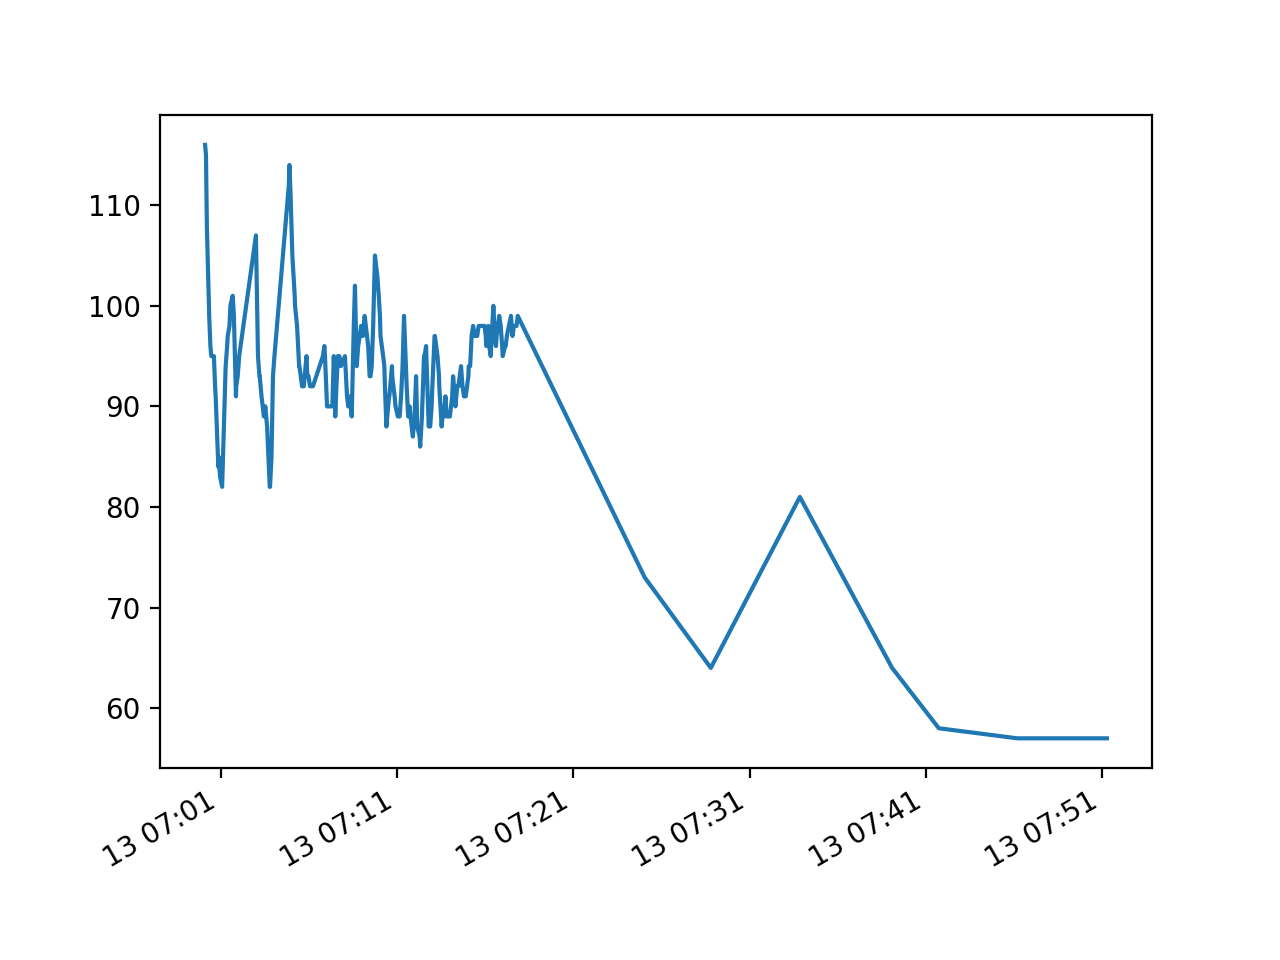

<IPython.core.display.Javascript object>


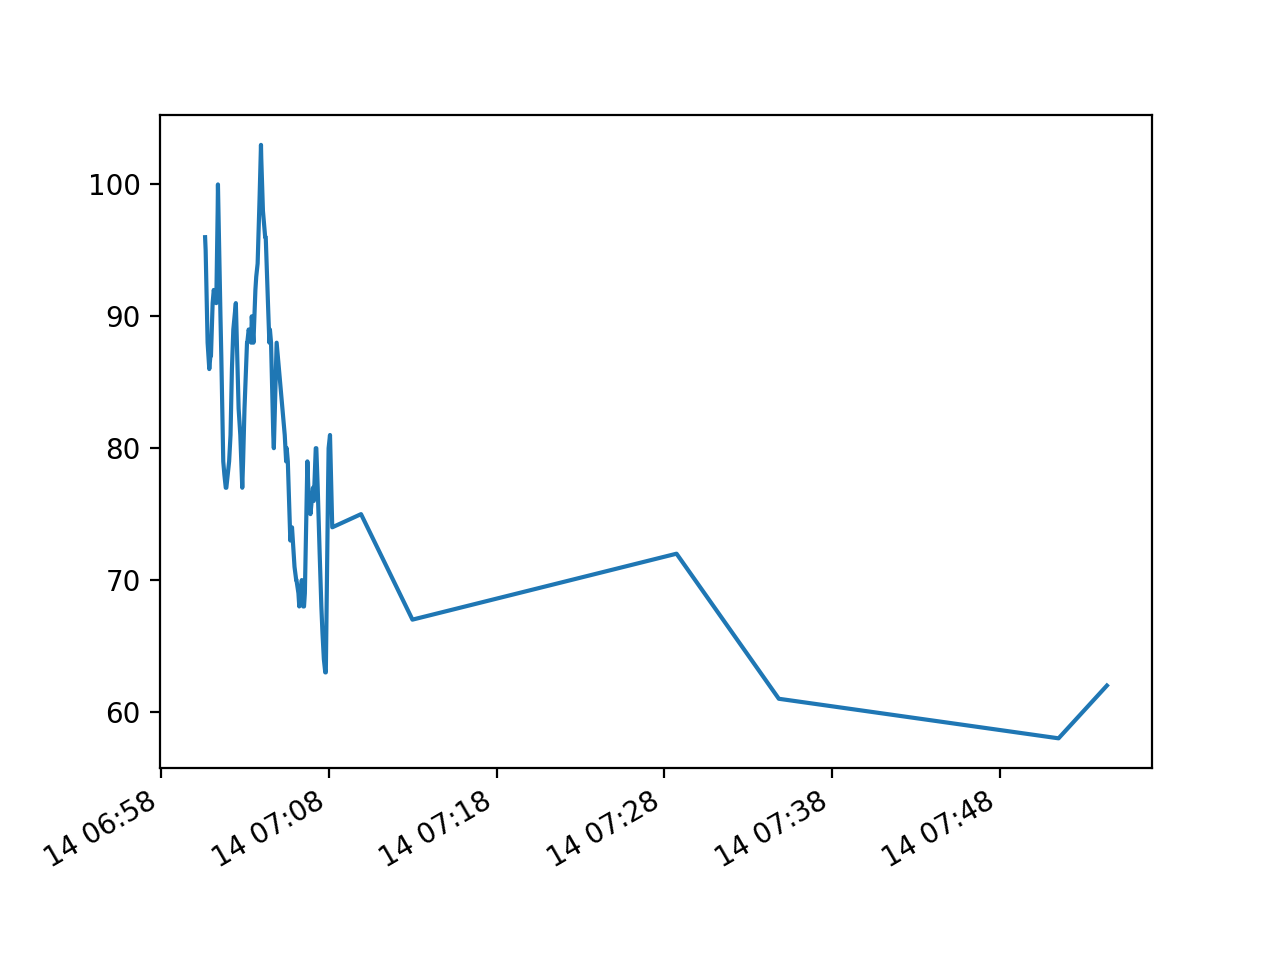

<IPython.core.display.Javascript object>


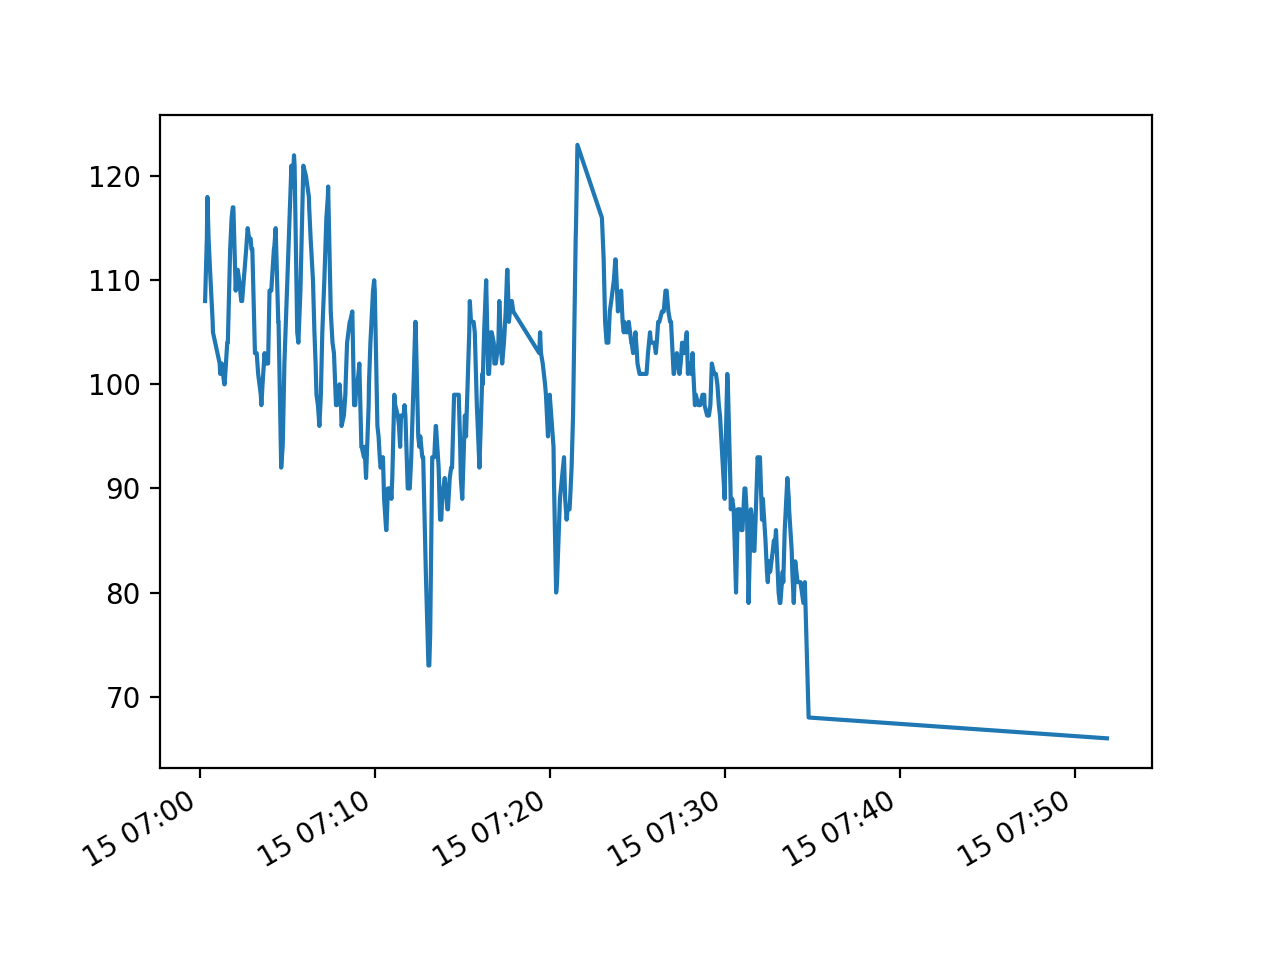

<IPython.core.display.Javascript object>


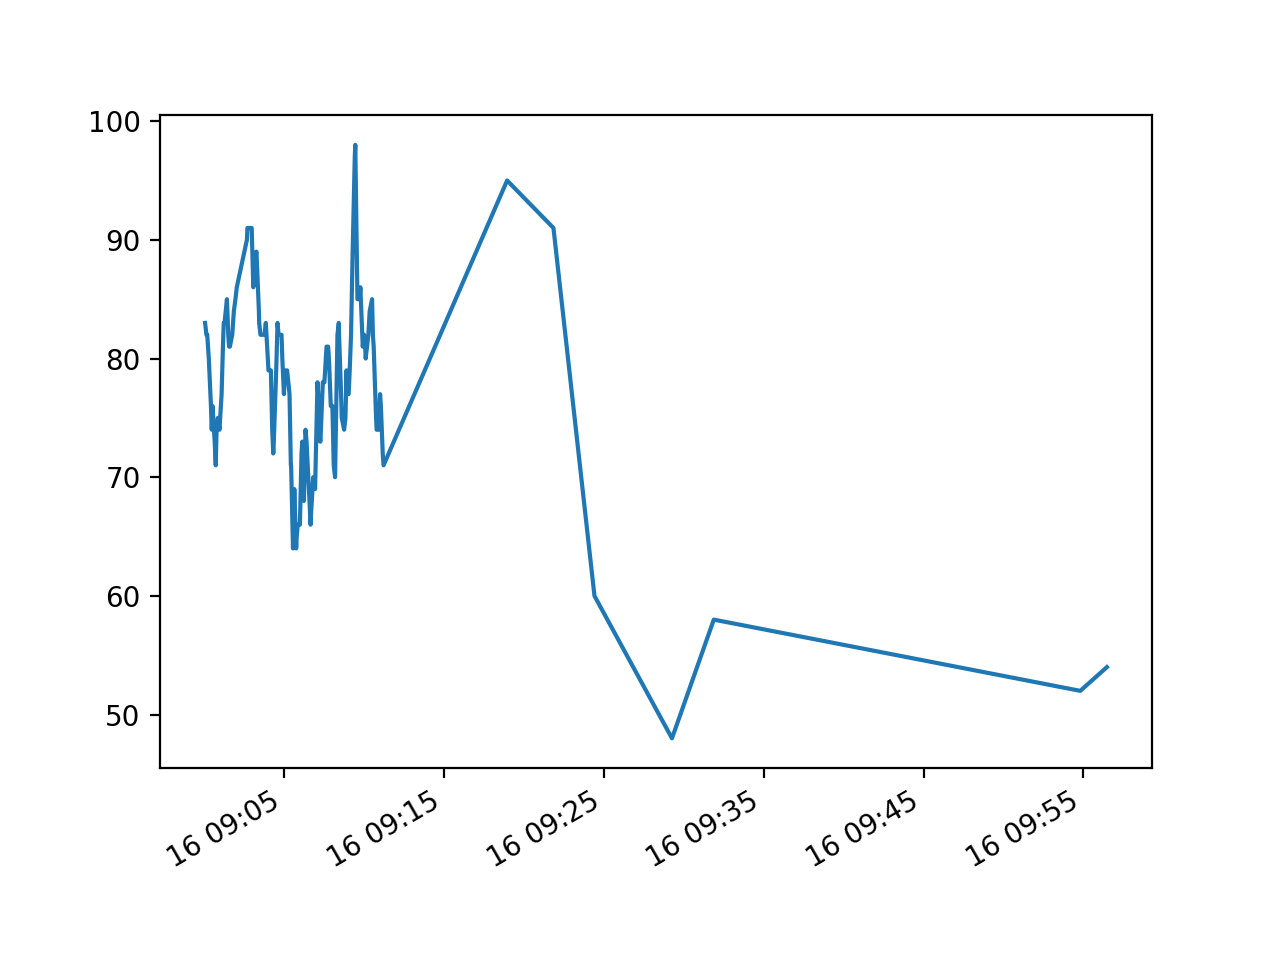

In [189]:
from datetime import date
#int(date.today().strftime('%d'))+1
for i in range (13,df.index[-1].day):
    try:
        plt.figure()
        df_plot=df_week_days[df_week_days.index.day==i] if i not in [2,3,9,10,16,17,23,24] else df_weekend[df_weekend.index.day==i]
        plt.plot(df_plot.index,df_plot.value)
        plt.gcf().autofmt_xdate()
    except:
        pass

In [190]:
def filter_signal(df,column,plotBoth=True):
    from scipy import fftpack
    import numpy as np
    
    time_vec=df.index.values
    sig = df[column].values
    sig_fft = fftpack.fft(sig)
    power = np.abs(sig_fft)
    sample_freq = fftpack.fftfreq(sig.size, d=1)
    pos_mask = np.where(sample_freq > 0)
    freqs = sample_freq[pos_mask]
    peak_freq = freqs[power[pos_mask].argmax()]
    high_freq_fft = sig_fft.copy()
    high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
    filtered_sig = fftpack.ifft(high_freq_fft)
    if plotBoth:
        plt.figure(figsize=(6, 5))
        plt.plot(time_vec, sig, label='Original signal')
        plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.legend(loc='best')

<IPython.core.display.Javascript object>


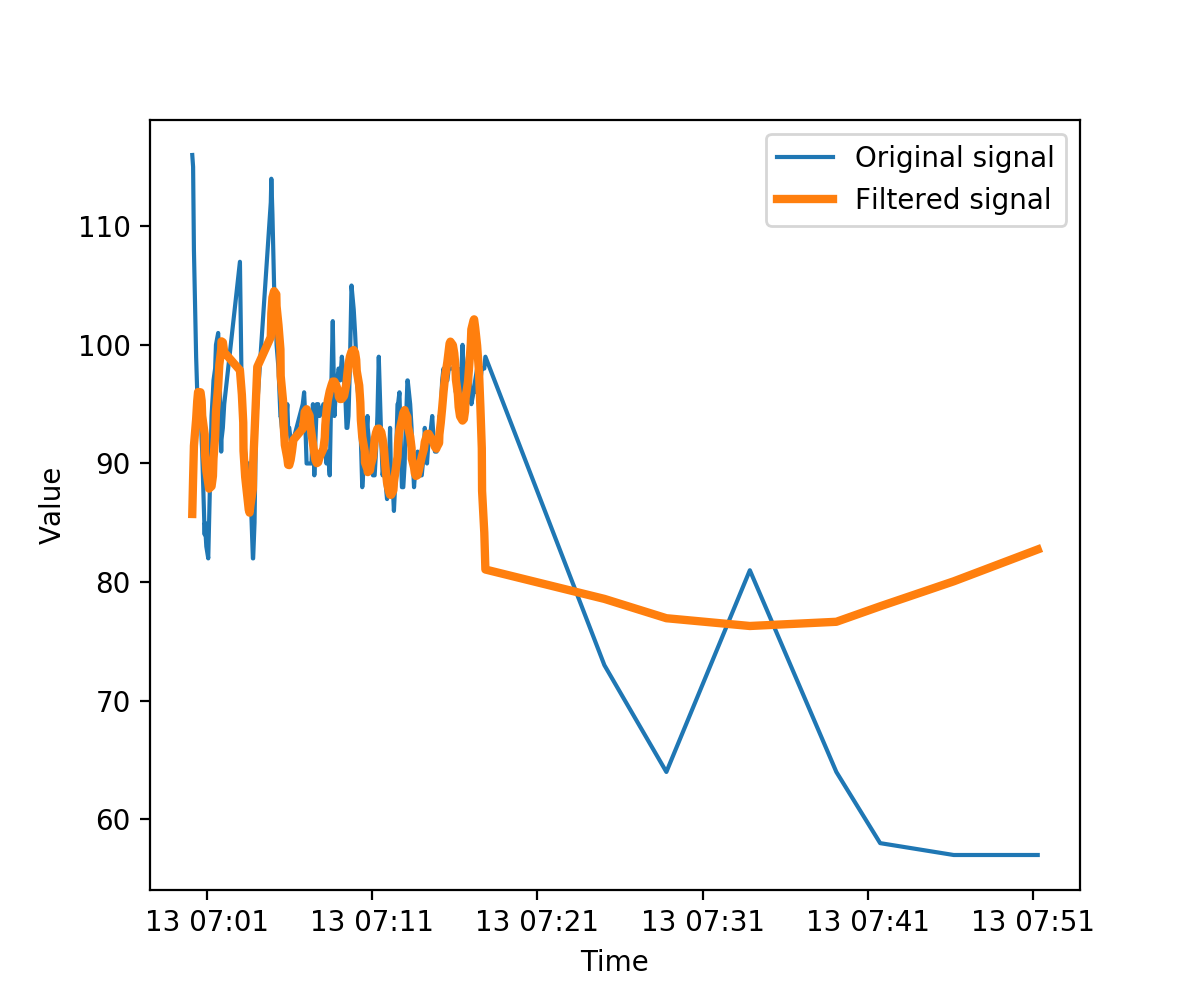

<IPython.core.display.Javascript object>


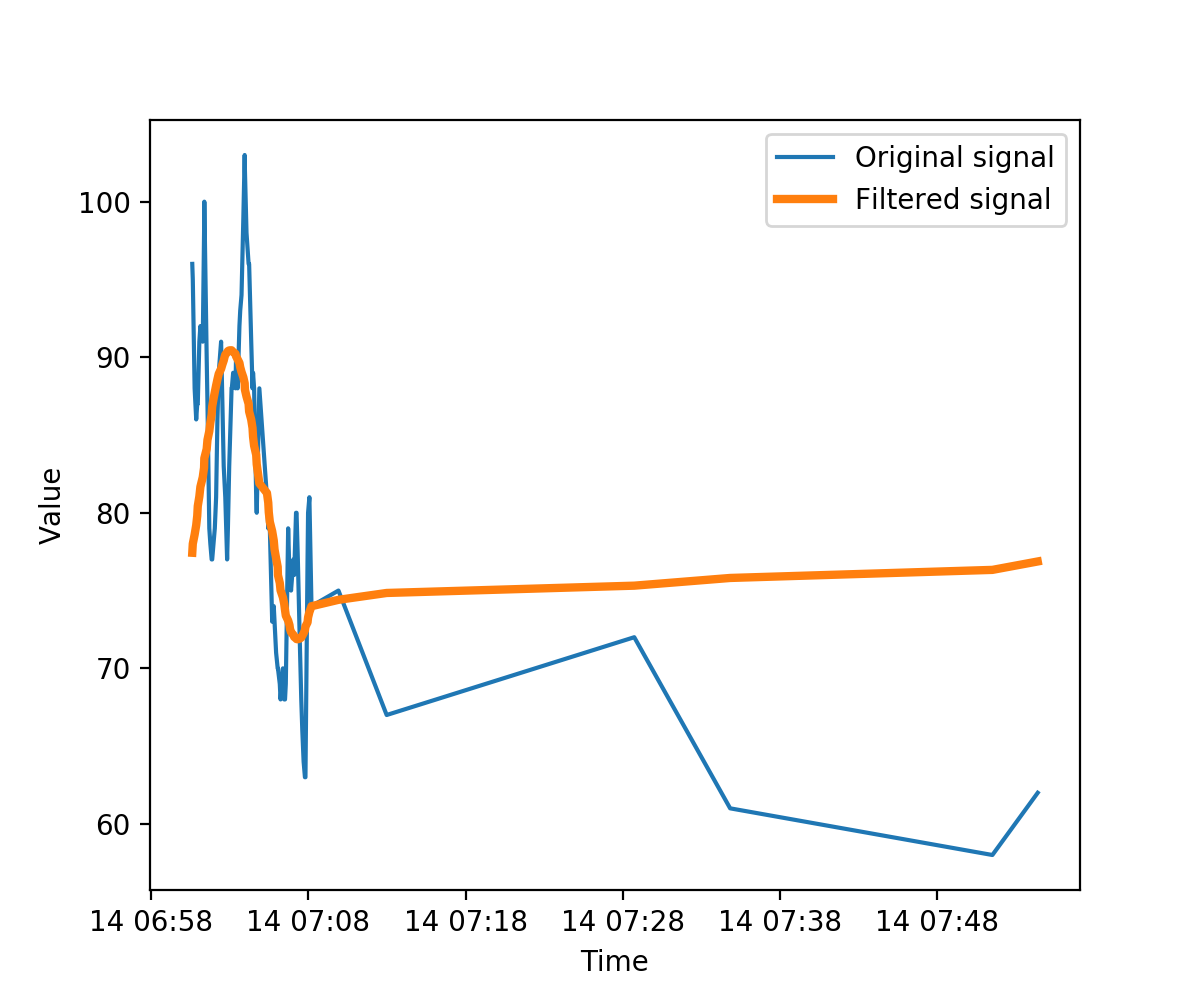

<IPython.core.display.Javascript object>


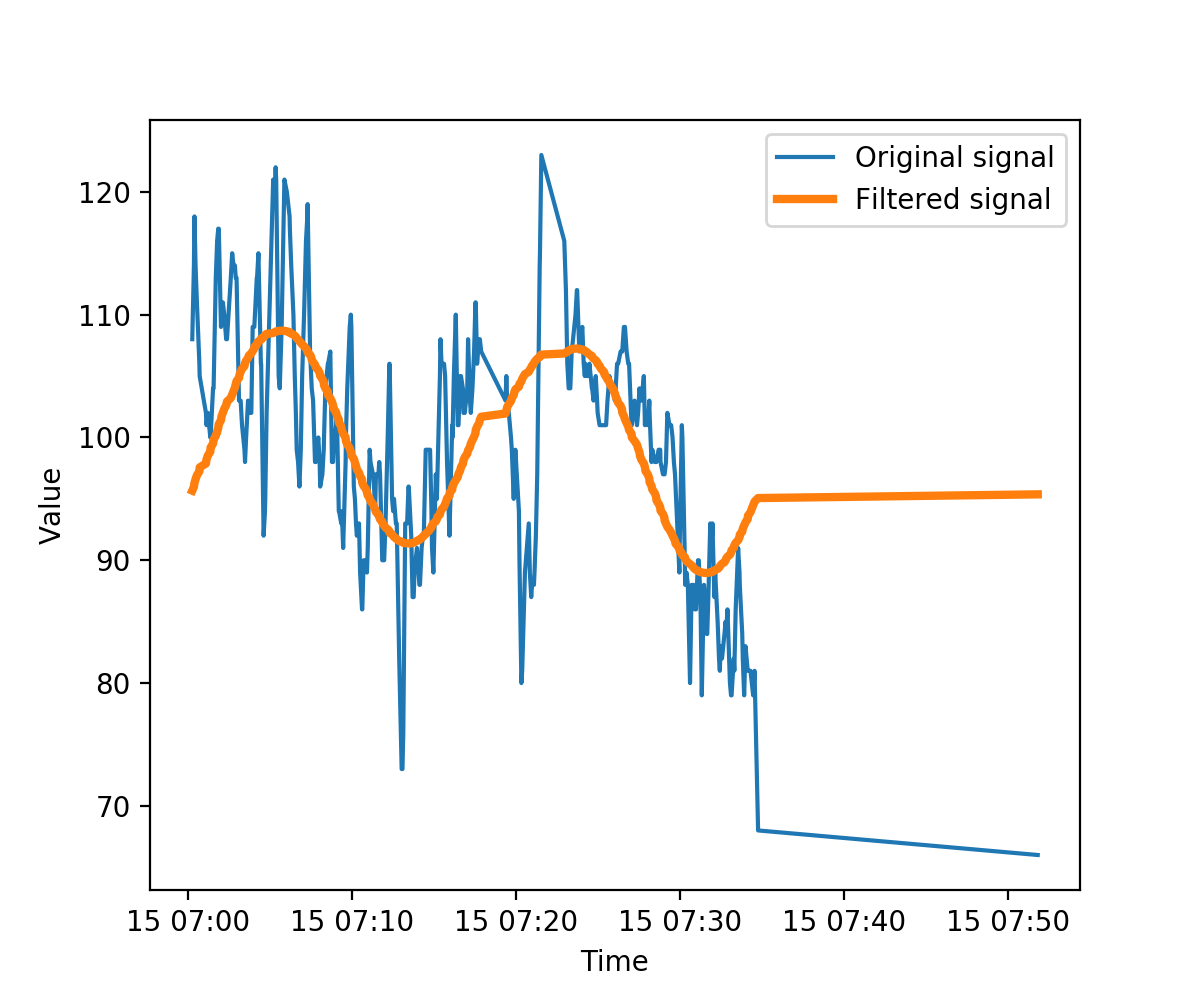

<IPython.core.display.Javascript object>


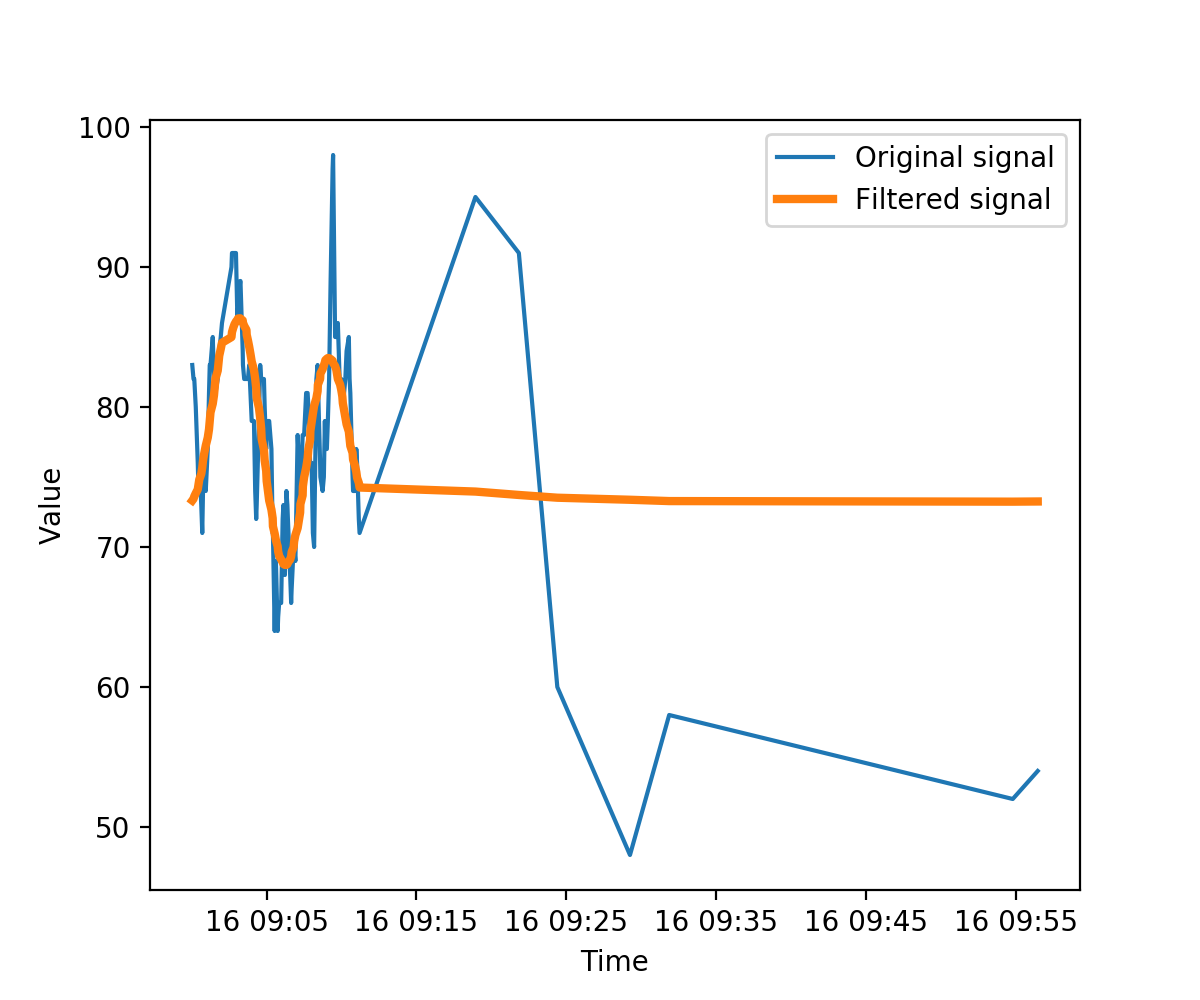

In [192]:
for i in range (13,df.index[-1].day):
    df_bis=df_week_days[df_week_days.index.day==i] if i not in [2,3,9,10,16,17,23,24] else df_weekend[df_weekend.index.day==i]
    filter_signal(df=df_bis,column='value')
